# PROBLEM STATEMENT

- Dataset consists of 3000 Amazon customer reviews, star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots.
- The objective is to discover insights into consumer reviews and perfrom sentiment analysis on the data.
- Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews

# IMPORTING DATA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('dataset/amazon_alexa.tsv', sep = '\t')

In [3]:
dataset.head(10)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [4]:
dataset.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
dataset.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [7]:
print(dataset['verified_reviews'])

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object


# VISUALIZING THE DATA

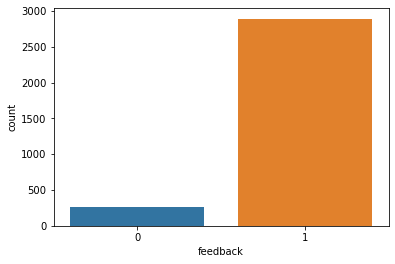

In [8]:
sns.countplot(dataset['feedback'])

In [9]:
positive = dataset[dataset['feedback'] == 1]
negative = dataset[dataset['feedback'] != 1]

print('positive =', len(positive))
print('negative =', len(negative))

positive = 2893
negative = 257


In [10]:
print(positive)

      rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                                                

In [11]:
print(negative)

      rating       date             variation  \
46         2  30-Jul-18      Charcoal Fabric    
111        2  30-Jul-18      Charcoal Fabric    
141        1  30-Jul-18      Charcoal Fabric    
162        1  30-Jul-18     Sandstone Fabric    
176        2  30-Jul-18  Heather Gray Fabric    
...      ...        ...                   ...   
3047       1  30-Jul-18            Black  Dot   
3048       1  30-Jul-18            White  Dot   
3067       2  30-Jul-18            Black  Dot   
3091       1  30-Jul-18            Black  Dot   
3096       1  30-Jul-18            White  Dot   

                                       verified_reviews  feedback  
46    It's like Siri, in fact, Siri answers more acc...         0  
111   Sound is terrible if u want good music too get...         0  
141                                  Not much features.         0  
162   Stopped working after 2 weeks ,didn't follow c...         0  
176                                Sad joke. Worthless.         0  
...

In [12]:
print('positive % = ', (len(positive) / len(dataset['feedback']))*100 )
print('negative % = ', (len(negative) / len(dataset['feedback']))*100 )

positive % =  91.84126984126985
negative % =  8.158730158730158


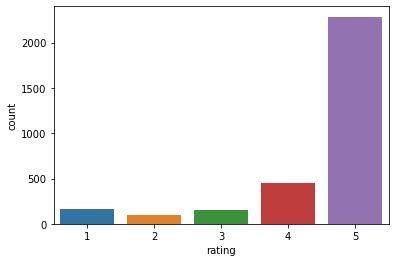

In [13]:
sns.countplot(dataset['rating'])

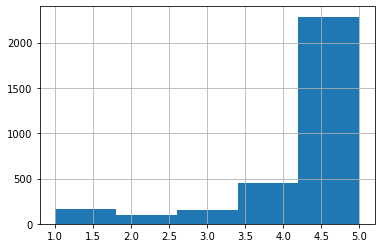

In [14]:
dataset['rating'].hist(bins = 5)

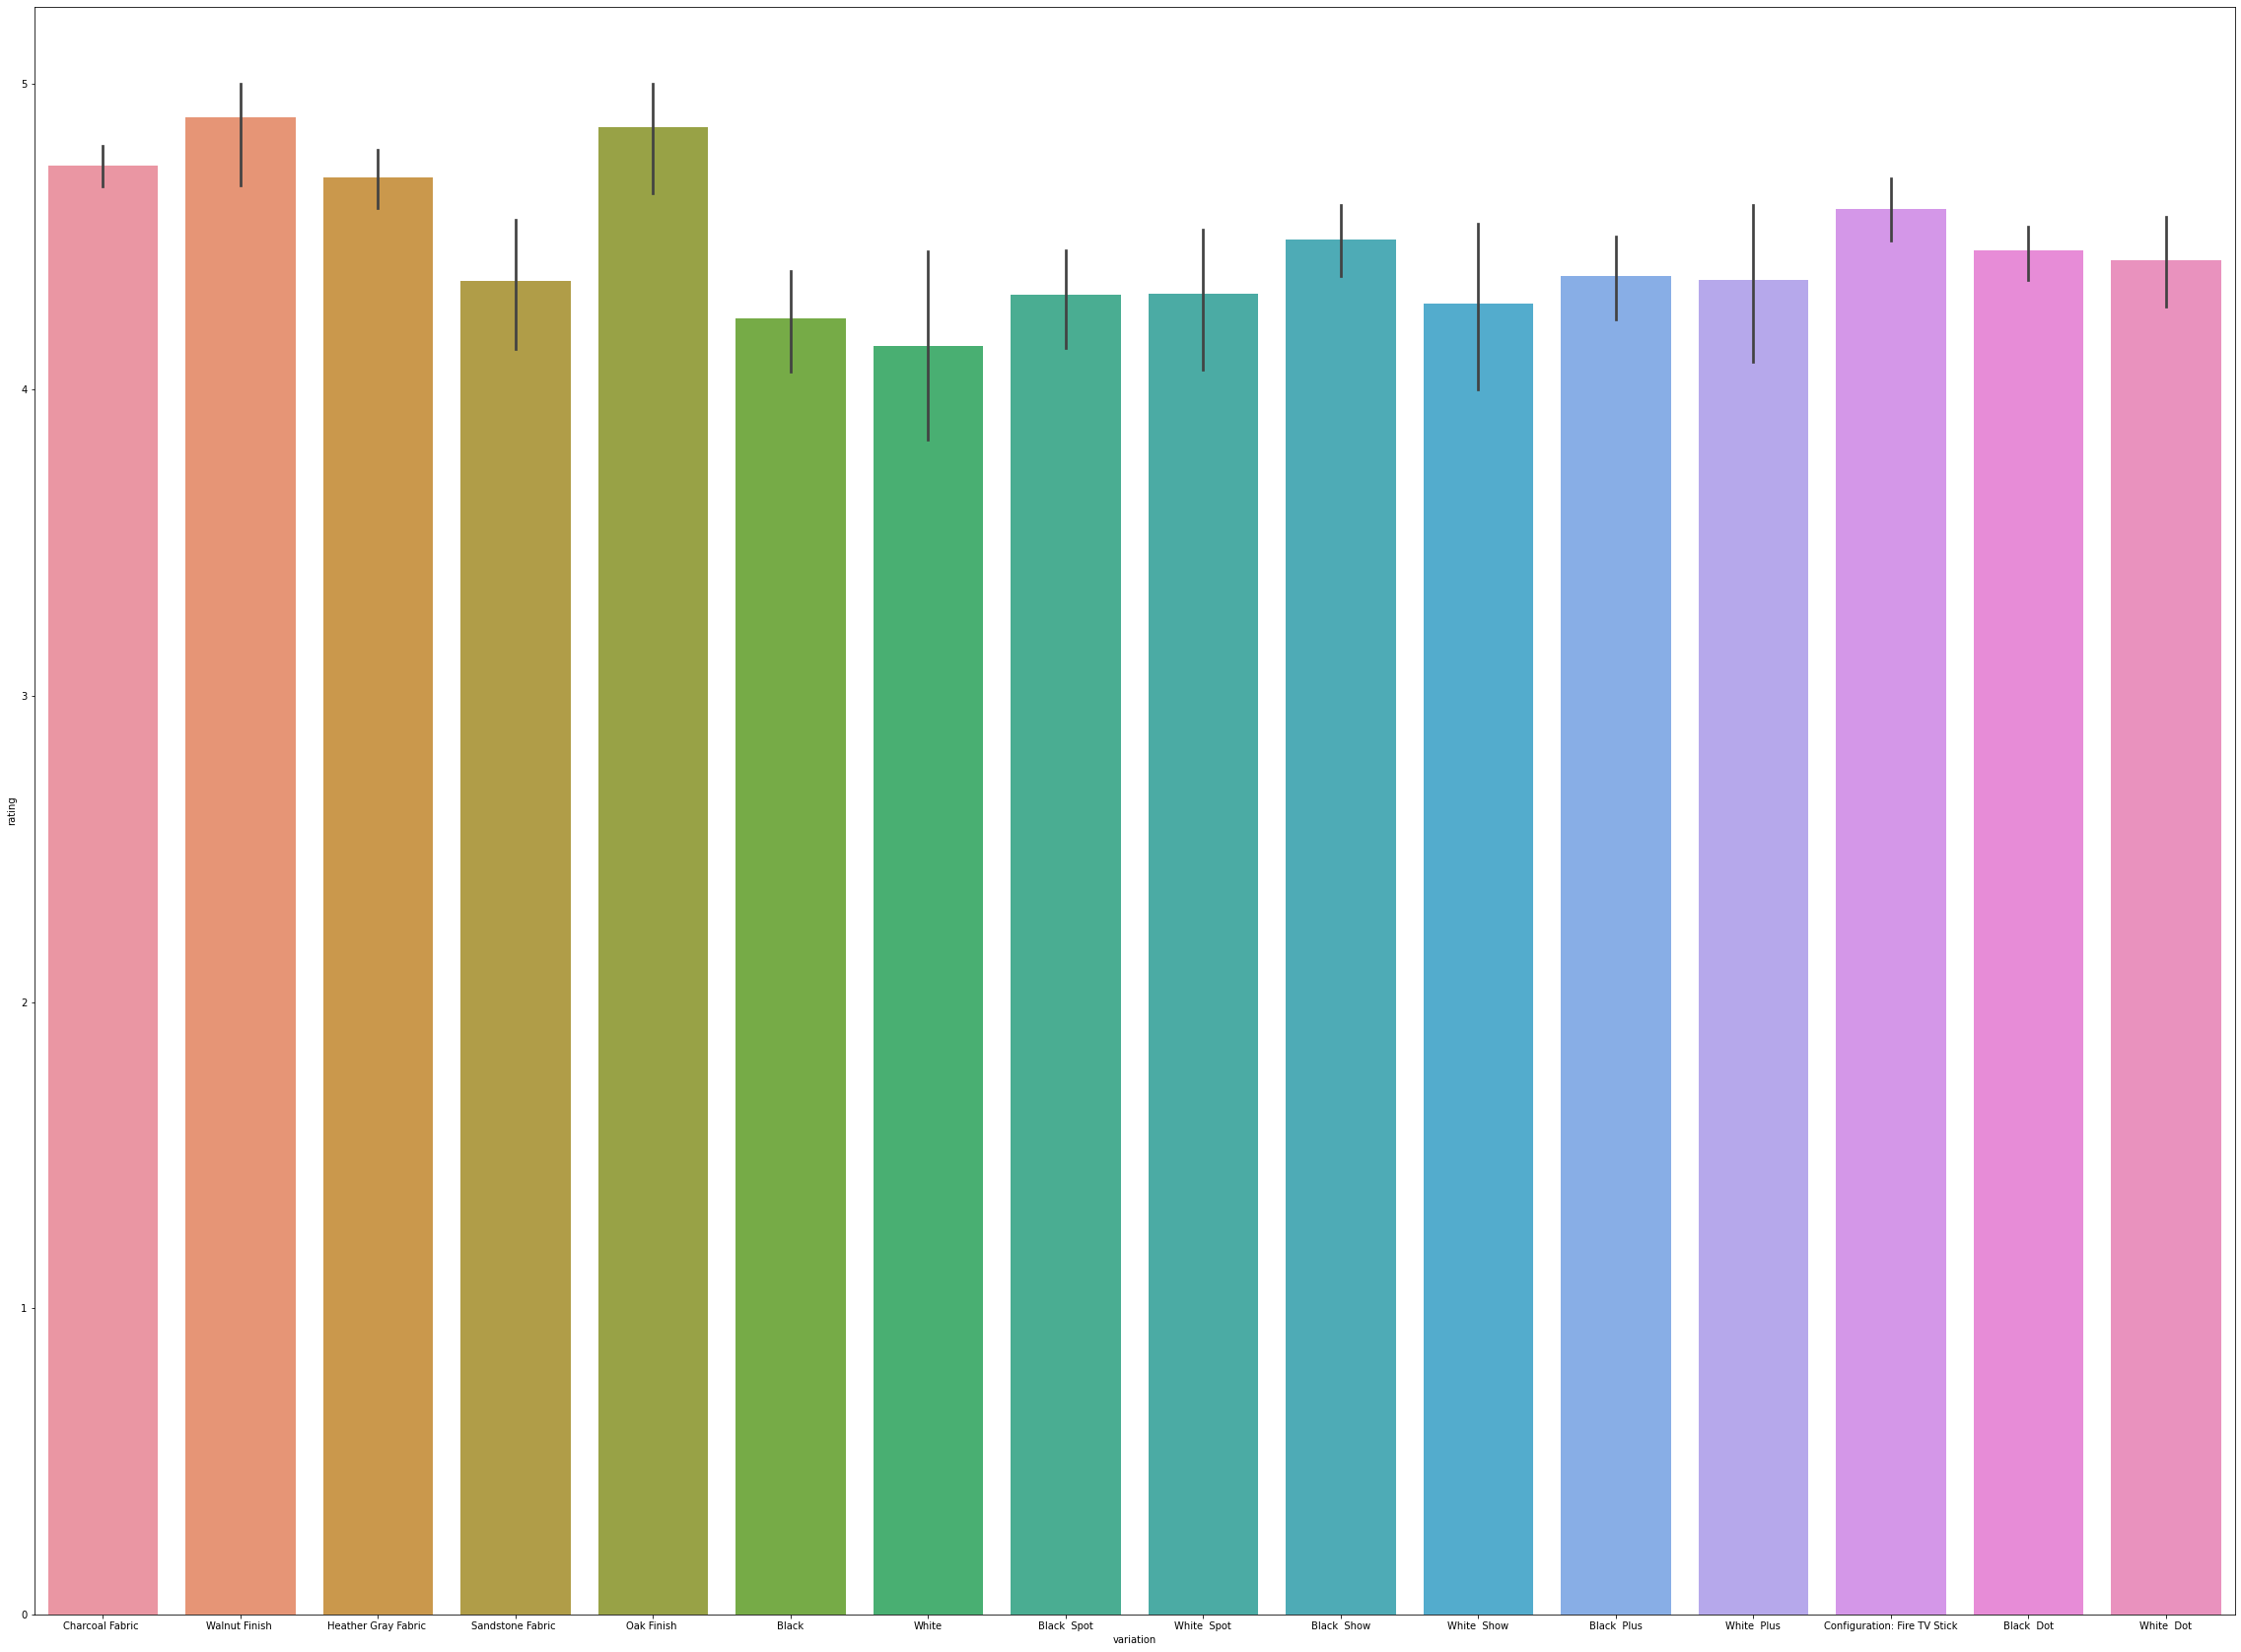

In [15]:
plt.figure(figsize = (40, 30))
sns.barplot(x = 'variation', y = 'rating', data = dataset)

# DATA CLEANING/FEATURE ENGINEERING

In [16]:
dataset.drop(['date', 'rating'], axis = 1, inplace = True)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   variation         3150 non-null   object
 1   verified_reviews  3150 non-null   object
 2   feedback          3150 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 74.0+ KB


In [18]:
variation_dummies = pd.get_dummies(dataset['variation'], drop_first = True)

In [19]:
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [20]:
dataset.drop(['variation'], axis = 1, inplace = True)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   verified_reviews  3150 non-null   object
 1   feedback          3150 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 49.3+ KB


In [22]:
dataset = pd.concat([dataset, variation_dummies], axis = 1)

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   verified_reviews              3150 non-null   object
 1   feedback                      3150 non-null   int64 
 2   Black  Dot                    3150 non-null   uint8 
 3   Black  Plus                   3150 non-null   uint8 
 4   Black  Show                   3150 non-null   uint8 
 5   Black  Spot                   3150 non-null   uint8 
 6   Charcoal Fabric               3150 non-null   uint8 
 7   Configuration: Fire TV Stick  3150 non-null   uint8 
 8   Heather Gray Fabric           3150 non-null   uint8 
 9   Oak Finish                    3150 non-null   uint8 
 10  Sandstone Fabric              3150 non-null   uint8 
 11  Walnut Finish                 3150 non-null   uint8 
 12  White                         3150 non-null   uint8 
 13  White  Dot        

In [24]:
dataset.isnull().sum()

verified_reviews                0
feedback                        0
Black  Dot                      0
Black  Plus                     0
Black  Show                     0
Black  Spot                     0
Charcoal Fabric                 0
Configuration: Fire TV Stick    0
Heather Gray Fabric             0
Oak Finish                      0
Sandstone Fabric                0
Walnut Finish                   0
White                           0
White  Dot                      0
White  Plus                     0
White  Show                     0
White  Spot                     0
dtype: int64

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
vectorizer = CountVectorizer()

In [27]:
reviews_vectorizer = vectorizer.fit_transform(dataset['verified_reviews'])

In [28]:
reviews_vectorizer.shape

(3150, 4044)

In [29]:
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [30]:
print(reviews_vectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [31]:
dataset.drop(['verified_reviews'], axis = 1, inplace = True)

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   feedback                      3150 non-null   int64
 1   Black  Dot                    3150 non-null   uint8
 2   Black  Plus                   3150 non-null   uint8
 3   Black  Show                   3150 non-null   uint8
 4   Black  Spot                   3150 non-null   uint8
 5   Charcoal Fabric               3150 non-null   uint8
 6   Configuration: Fire TV Stick  3150 non-null   uint8
 7   Heather Gray Fabric           3150 non-null   uint8
 8   Oak Finish                    3150 non-null   uint8
 9   Sandstone Fabric              3150 non-null   uint8
 10  Walnut Finish                 3150 non-null   uint8
 11  White                         3150 non-null   uint8
 12  White  Dot                    3150 non-null   uint8
 13  White  Plus                   315

In [33]:
encoded_reviews =  pd.DataFrame(reviews_vectorizer.toarray())

In [34]:
encoded_reviews

,0,1,2,3,4,5,6,7,8,9,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
dataset = pd.concat([dataset, encoded_reviews], axis = 1)

In [36]:
dataset

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
X = dataset.drop(['feedback'], axis = 1)
y = dataset['feedback']

print(X.shape)
print(y.shape)

(3150, 4059)
(3150,)


# MODEL TRAINING

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2520, 4059) (2520,)
(630, 4059) (630,)


In [40]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [41]:
randomforest_classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy')
randomforest_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

# EVALUATING THE MODEL

In [42]:
y_predict = randomforest_classifier.predict(X_test)

print(y_predict)
print(y_predict.shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 0 

        Pred:0  Pred:1
True:0      15      35
True:1       2     578


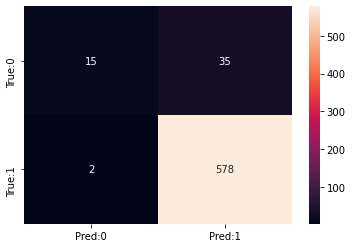

In [43]:
cm = confusion_matrix(y_test, y_predict)
conf_matrix = pd.DataFrame(data = cm, columns = ['Pred:0','Pred:1'], index = ['True:0','True:1'])
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, fmt = 'd')

In [44]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.30      0.45        50
           1       0.94      1.00      0.97       580

    accuracy                           0.94       630
   macro avg       0.91      0.65      0.71       630
weighted avg       0.94      0.94      0.93       630



# IMPROVE THE MODEL

In [45]:
dataset = pd.read_csv('dataset/amazon_alexa.tsv', sep='\t')

In [46]:
dataset = pd.concat([dataset, pd.DataFrame(reviews_vectorizer.toarray())], axis = 1)

In [47]:
dataset

,rating,date,variation,verified_reviews,feedback,0,1,2,3,4,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,31-Jul-18,Charcoal Fabric,Music,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
dataset['length'] = dataset['verified_reviews'].apply(len)

In [49]:
dataset['length']

0        13
1         9
2       195
3       172
4         5
       ... 
3145     50
3146    135
3147    441
3148    380
3149      4
Name: length, Length: 3150, dtype: int64

In [50]:
X = dataset.drop(['date', 'verified_reviews', 'rating', 'variation', 'feedback'], axis = 1)
y = dataset['feedback']

print(X.shape, y.shape)

(3150, 4045) (3150,)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2520, 4045) (2520,)
(630, 4045) (630,)


In [52]:
randomforest_classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy')
randomforest_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [53]:
y_predict = randomforest_classifier.predict(X_test)

print(y_predict)
print(y_predict.shape)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 0 

        Pred:0  Pred:1
True:0      15      35
True:1       2     578


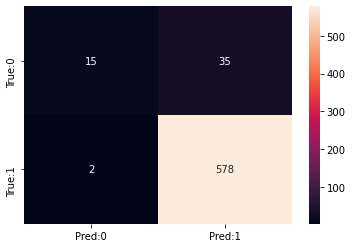

In [54]:
cm = confusion_matrix(y_test, y_predict)
conf_matrix = pd.DataFrame(data = cm, columns = ['Pred:0','Pred:1'], index = ['True:0','True:1'])
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, fmt = 'd')

In [55]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.30      0.45        50
           1       0.94      1.00      0.97       580

    accuracy                           0.94       630
   macro avg       0.91      0.65      0.71       630
weighted avg       0.94      0.94      0.93       630

